In [16]:
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

In [17]:
#Preparação para o Qbit da Alice.

psi = random_statevector(2)
array_to_latex(psi)
#plot_bloch_multivector(psi)

<IPython.core.display.Latex object>

In [18]:
#Esta função serve para inicializar amplitudes complexas
init_state = Initialize(psi)
#Colocamos um label no estado para ficar mais fácil de visualiza-lo no circuito posteriormente
init_state.label = "initial_state"

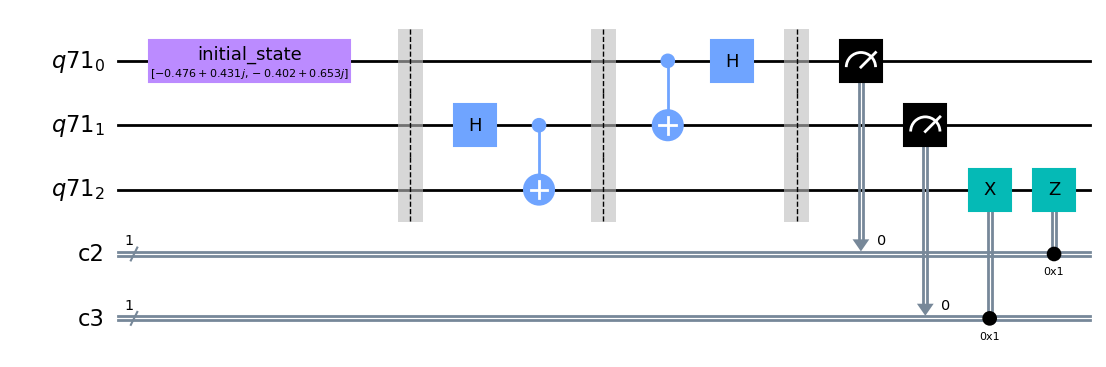

In [19]:
#Precisaremos de 5 registradores. 3 quânticos e 2 clássicos. Os registradores quânticos serão responsáveis
#por manipular os qubits enquanto os clássicos usaremos para desempenhar o papel da Alice no Algoritmo.
qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)

qc = QuantumCircuit(qr,crz,crx)
#qc.draw('mpl')

#Inclui o estado inicial no circuito
qc.append(init_state,[0])
qc.barrier()

#Cria o estado de Bell
qc.h(1)
qc.cx(1,2) #1 controle 2 alvo
qc.barrier()

#Criamos os gates responsáveis pela ação de Alice
qc.cx(0,1)
qc.h(0)    

#Medição
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)

#Gates responsáveis pela ação de Bob
qc.x(2).c_if(crx,1)
qc.z(2).c_if(crz,1)

qc.draw('mpl')  #pro mpl funcionar você precisa instalar pylatexenc

In [15]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result().get_statevector(qc,decimals=3)

#plot_bloch_multivector(result)
#array_to_latex(psi)

array_to_latex(result)

<IPython.core.display.Latex object>